In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    1985 non-null   object 
 8   peripheral_pulse       1952 non-null   object 
 9   mucous_membrane        2025 non-null   object 
 10  capillary_refill_time  2047 non-null   object 
 11  pain                   1986 non-null   object 
 12  peristalsis            2020 non-null   object 
 13  abdominal_distention   2014 non-null   object 
 14  nasogastric_tube       1915 non-null   object 
 15  naso

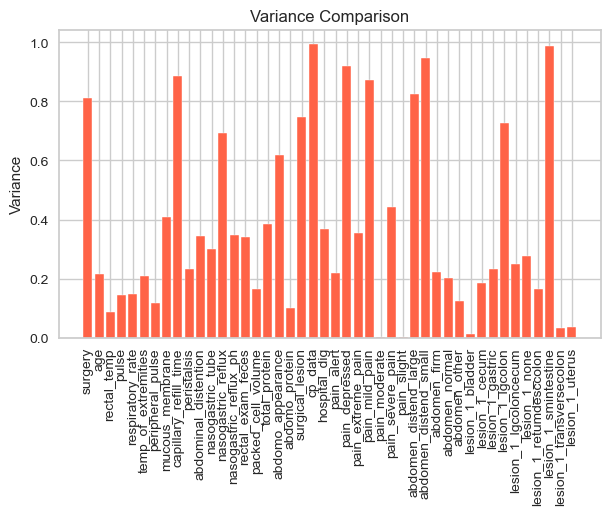

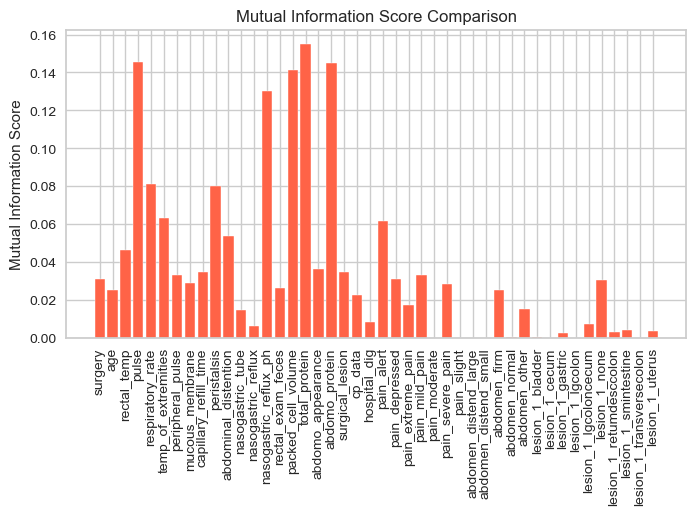

Elbow Method to determine the number of clusters to be formed:


C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

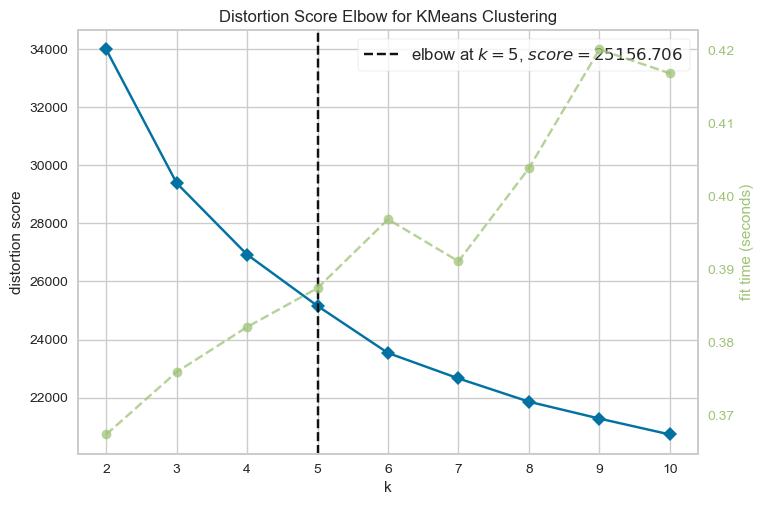

C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_18488\2014157224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['c1','c2','c3','c4','c5']] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_18488\2014157224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['c1','c2','c3','c4','c5']] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
C:\Users\Fabrizio Ortega\AppData\L

In [53]:
%run clustering.ipynb

In [13]:
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
%matplotlib notebook

def plot_3d_optimization(scores_matrix, col1, col2, col1_name: str='x', col2_name: str='y',norm=False):
    scores_matrix_avg = np.empty((len(scores_matrix),len(scores_matrix[0])))
    for i in range(len(scores_matrix)):
        for j in range(len(scores_matrix[i])):
            scores_matrix_avg[i][j] = scores_matrix[i][j].mean()
            
    z = scores_matrix_avg.transpose()
    nrows, ncols = z.shape
    if norm:
        x = np.arange(0, ncols, 1)
        y = np.arange(0, nrows, 1)
    else:
        x = np.linspace(col1.min(), col1.max(), ncols)
        y = np.linspace(col2.min(), col2.max(), nrows)
    x, y = np.meshgrid(x, y)
    
    # Set up plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
    
    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=False, shade=False)
    ax.set_xlabel(col1_name)
    ax.set_ylabel(col2_name)
    
    plt.show()

In [54]:
from sklearn.preprocessing import OrdinalEncoder

df_filtered.columns = df_filtered.columns.astype(str)
#x_train = df_x[~pre_df.outcome.isna()]
x_train = df_filtered[~pre_df.outcome.isna()]
y_train = df_y[~pre_df.outcome.isna()]
y_train_enc = OneHotEncoder(sparse_output=False).fit_transform(y_train.to_numpy().reshape(-1, 1))
ord_enc = OrdinalEncoder()
y_train_ord = ord_enc.fit_transform(y_train.to_numpy().reshape(-1, 1))

In [55]:
len(x_train.columns)

41

In [56]:
rf = RandomForestClassifier(n_estimators=30,max_depth=7,max_features=5,min_samples_split=10,random_state=1)
scores = cross_validate(rf, x_train, y_train, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)

scores['test_score']

array([0.76518219, 0.66801619, 0.72064777, 0.69230769, 0.65991903])

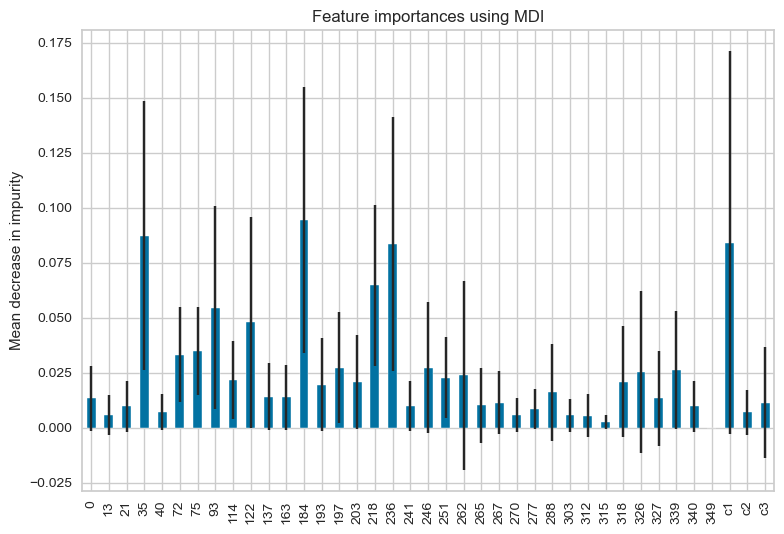

In [48]:
rf.fit(x_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(rf.feature_importances_, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:

xps=np.arange(5,15,1)
yps=np.arange(5,15,1)
scores_matrix=np.empty((len(xps),len(yps),5))
for i in range(len(xps)):
    for j in range(len(yps)):
        model = RandomForestClassifier(n_estimators=30,max_depth=xps[i],max_features=yps[j],min_samples_split=10,random_state=1)
        scores = cross_validate(model, x_train, y_train, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        print((i*len(yps)+j)/(len(yps)*len(xps)),xps[i],yps[j],scores_matrix[i][j].mean())

0.0 5 5 0.6931174089068828
0.01 5 6 0.6874493927125507
0.02 5 7 0.6834008097165992
0.03 5 8 0.6842105263157894
0.04 5 9 0.6850202429149798
0.05 5 10 0.6890688259109312
0.06 5 11 0.6923076923076923
0.07 5 12 0.6979757085020243
0.08 5 13 0.691497975708502
0.09 5 14 0.6890688259109312
0.1 6 5 0.697165991902834
0.11 6 6 0.6914979757085021
0.12 6 7 0.6939271255060728
0.13 6 8 0.6914979757085021
0.14 6 9 0.6963562753036437
0.15 6 10 0.691497975708502
0.16 6 11 0.6931174089068826
0.17 6 12 0.6979757085020243
0.18 6 13 0.6898785425101215
0.19 6 14 0.6923076923076923
0.2 7 5 0.7004048582995952
0.21 7 6 0.697165991902834
0.22 7 7 0.7004048582995951
0.23 7 8 0.6906882591093118
0.24 7 9 0.6939271255060729
0.25 7 10 0.6979757085020243
0.26 7 11 0.6866396761133603
0.27 7 12 0.6923076923076923
0.28 7 13 0.6890688259109312
0.29 7 14 0.6898785425101215
0.3 8 5 0.6939271255060728
0.31 8 6 0.6874493927125507
0.32 8 7 0.6890688259109312
0.33 8 8 0.6858299595141701
0.34 8 9 0.6955465587044535
0.35 8 10 0.6

In [18]:
plot_3d_optimization(scores_matrix,xps,yps,'max_depth','max_features')

<IPython.core.display.Javascript object>

In [64]:
params = {'eta': 0.0764015335884567,
 'n_estimators': 97,
 'max_depth': 7,
 'reg_lambda': 2.28261070970203,
 'subsample': 0.5327340915258029,
 'min_child_weight': 4,
 'colsample_bytree': 0.34869913395443924,
 'objective': 'multi:softmax',
 'random_state': 1}
xgb_tuned = XGBClassifier(**params)
#xgb_tuned = XGBClassifier(n_estimators = 30,max_depth = 20,subsample = 0.5,learning_rate = 0.07,random_state = 1)
scores = cross_validate(xgb_tuned, x_train, y_train_ord, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)

scores['test_score']

array([0.72874494, 0.70445344, 0.70445344, 0.71255061, 0.76518219])

In [19]:
xps=np.linspace(1e-3,0.1,50)
yps=np.linspace(0.1,0.9,10)
scores_matrix=np.empty((len(xps),len(yps),5))
for i in range(len(xps)):
    for j in range(len(yps)):
        model = XGBClassifier(n_estimators = 30,max_depth =5, subsample = yps[j],learning_rate = xps[i],random_state = 1)
        scores = cross_validate(model, x_train, y_train_ord, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        
        print((i*len(yps)+j)/(len(yps)*len(xps)),xps[i],yps[j],scores_matrix[i][j].mean())

0.0 0.001 0.1 0.6761133603238867
0.002 0.001 0.18888888888888888 0.6923076923076923
0.004 0.001 0.2777777777777778 0.688259109311741
0.006 0.001 0.3666666666666667 0.6939271255060728
0.008 0.001 0.4555555555555556 0.6906882591093118
0.01 0.001 0.5444444444444445 0.6931174089068827
0.012 0.001 0.6333333333333333 0.6931174089068826
0.014 0.001 0.7222222222222222 0.6923076923076923
0.016 0.001 0.8111111111111111 0.6866396761133603
0.018 0.001 0.9 0.682591093117409
0.02 0.0030204081632653063 0.1 0.6736842105263158
0.022 0.0030204081632653063 0.18888888888888888 0.6947368421052632
0.024 0.0030204081632653063 0.2777777777777778 0.6866396761133604
0.026 0.0030204081632653063 0.3666666666666667 0.6906882591093118
0.028 0.0030204081632653063 0.4555555555555556 0.6923076923076923
0.03 0.0030204081632653063 0.5444444444444445 0.6947368421052632
0.032 0.0030204081632653063 0.6333333333333333 0.6939271255060729
0.034 0.0030204081632653063 0.7222222222222222 0.6947368421052632
0.036 0.00302040816326

In [20]:
plot_3d_optimization(scores_matrix,xps,yps,'lr','max_depth')

<IPython.core.display.Javascript object>

In [155]:
svm_tunned = SVC(kernel='poly', C=0.5,degree=5,random_state=1, probability=True)
scores = cross_validate(svm_tunned, x_train, y_train, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
#1 / (2 * (4**2))
scores['test_score']

array([0.66396761, 0.70445344, 0.73684211, 0.64777328, 0.68016194])

In [158]:
xs=np.linspace(1e-3,1,20)
ys=np.arange(1,3,1)
scores_matrix=np.empty((len(xs),len(ys),5))
for i in range(len(xs)):
    for j in range(len(ys)):
        model = SVC(kernel='rbf', C=xs[i],random_state=1)
        scores = cross_validate(model, x_train, y_train, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
        scores_matrix[i][j]=scores['test_score']
        print((i*len(ys)+j)/(len(ys)*len(xs)),scores_matrix[i][j].mean())

0.0 0.46477732793522264
0.025 0.46477732793522264
0.05 0.5935222672064777
0.075 0.5935222672064777
0.1 0.6510121457489879
0.125 0.6510121457489879
0.15 0.6850202429149798
0.175 0.6850202429149798
0.2 0.6874493927125507
0.225 0.6874493927125507
0.25 0.682591093117409
0.275 0.682591093117409
0.3 0.6834008097165991
0.325 0.6834008097165991
0.35 0.68582995951417
0.375 0.68582995951417
0.4 0.6882591093117408
0.425 0.6882591093117408
0.45 0.6890688259109311
0.475 0.6890688259109311
0.5 0.6947368421052632
0.525 0.6947368421052632
0.55 0.697165991902834
0.575 0.697165991902834
0.6 0.6971659919028339
0.625 0.6971659919028339
0.65 0.6947368421052631
0.675 0.6947368421052631
0.7 0.6923076923076923
0.725 0.6923076923076923
0.75 0.6923076923076923
0.775 0.6923076923076923
0.8 0.6931174089068826
0.825 0.6931174089068826
0.85 0.6955465587044534
0.875 0.6955465587044534
0.9 0.6979757085020243
0.925 0.6979757085020243
0.95 0.6987854251012146
0.975 0.6987854251012146


In [159]:
plot_3d_optimization(scores_matrix,xs,ys,'Cs','degree')

<IPython.core.display.Javascript object>

In [51]:

model = LGBMClassifier(**{'n_estimators': 60,
 'learning_rate': 0.4669956666133753,
 'max_depth': 8,
 'num_leaves': 210,
 'reg_lambda': 4.235941804728504,
 'reg_alpha': 4.828111206786327,
 'subsample': 0.46967410733682896,
 'colsample_bytree': 0.5176061825459893,
 'min_child_samples': 17,
 'min_child_weight': 6,
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'boosting_type': 'gbdt',
 'random_state': 1})
scores = cross_validate(model, x_train, y_train_ord, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
scores['test_score']

array([0.69635628, 0.72469636, 0.72874494, 0.72469636, 0.67206478])

In [59]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(**{'iterations': 93, 'learning_rate': 0.2705656375684447, 'depth': 7, 'l2_leaf_reg': 6.131335206651145, 'grow_policy': 'Depthwise', 'bootstrap_type': 'Bayesian', 'od_type': 'Iter', 'eval_metric': 'TotalF1', 'loss_function': 'MultiClass', 'random_state': 1, 'verbose': 0})
scores = cross_validate(model, x_train, y_train_ord, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
scores['test_score']

array([0.71659919, 0.70445344, 0.71255061, 0.69230769, 0.63562753])

In [57]:

import optuna

def objective(trial):
    # model = LGBMClassifier(
    #     n_estimators = trial.suggest_int('n_estimators', 32, 256),
    #     learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5),
    #     max_depth = trial.suggest_int('max_depth', 1, 10),
    #     num_leaves = trial.suggest_int('num_leaves', 2, 1024),
    #     reg_lambda  = trial.suggest_float('reg_lambda', 0.001, 10),
    #     reg_alpha = trial.suggest_float('reg_alpha', 0, 10),
    #     subsample = trial.suggest_float('subsample', 0.001, 1),
    #     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1),
    #     min_child_samples = trial.suggest_int('min_child_samples', 2, 1024),
    #     min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
    #     objective = trial.suggest_categorical('objective', ['multiclass']),
    #     metric = trial.suggest_categorical('metric', ['multi_logloss']),
    #     boosting_type = trial.suggest_categorical('boosting_type', ['gbdt']),
    #     random_state = trial.suggest_categorical('random_state', [1])
    # )
    
    # model = CatBoostClassifier(
    #     iterations = trial.suggest_int('iterations', 32, 128),
    #     learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
    #     depth = trial.suggest_int('depth', 1, 10),
    #     l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 0.01, 10),
    #     grow_policy = trial.suggest_categorical('grow_policy', ['Depthwise']),
    #     bootstrap_type = trial.suggest_categorical('bootstrap_type', ['Bayesian']),
    #     od_type = trial.suggest_categorical('od_type', ['Iter']),
    #     eval_metric = trial.suggest_categorical('eval_metric', ['TotalF1']),
    #     loss_function = trial.suggest_categorical('loss_function', ['MultiClass']),
    #     random_state = trial.suggest_categorical('random_state', [1]),
    #     verbose = trial.suggest_categorical('verbose', [0]) 
    # )

    model = XGBClassifier(
        eta = trial.suggest_float('eta', 0.001, 0.3),
        n_estimators = trial.suggest_int('n_estimators', 32,128),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10),
        subsample = trial.suggest_float('subsample', 0.01, 1),
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.01, 1),
        objective = trial.suggest_categorical('objective', ['multi:softmax']),
        random_state = trial.suggest_categorical('random_state', [1])
    )

    scores = cross_validate(model, x_train, y_train_ord, scoring='f1_micro', 
                        cv=5, return_train_score=False,n_jobs=-1)
    return min(scores['test_score'])




In [58]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

study.best_params

[I 2023-10-01 15:57:57,592] A new study created in memory with name: no-name-18f15587-e2d0-4dea-8c4e-fa11c3e9e3c4
[I 2023-10-01 15:57:59,162] Trial 0 finished with value: 0.659919028340081 and parameters: {'eta': 0.19120926907648944, 'n_estimators': 98, 'max_depth': 7, 'reg_lambda': 2.8947673103103297, 'subsample': 0.35825424403016637, 'min_child_weight': 3, 'colsample_bytree': 0.9946137836860588, 'objective': 'multi:softmax', 'random_state': 1}. Best is trial 0 with value: 0.659919028340081.
[I 2023-10-01 15:58:00,417] Trial 1 finished with value: 0.6518218623481782 and parameters: {'eta': 0.24211372831221942, 'n_estimators': 62, 'max_depth': 7, 'reg_lambda': 7.228875966017187, 'subsample': 0.6609030083855738, 'min_child_weight': 5, 'colsample_bytree': 0.38665511177765677, 'objective': 'multi:softmax', 'random_state': 1}. Best is trial 0 with value: 0.659919028340081.
[I 2023-10-01 15:58:01,449] Trial 2 finished with value: 0.6356275303643725 and parameters: {'eta': 0.1936933090804073

KeyboardInterrupt: 

In [24]:
from sklearn.ensemble import VotingClassifier

lgbmparams={'n_estimators': 60,
 'learning_rate': 0.4669956666133753,
 'max_depth': 8,
 'num_leaves': 210,
 'reg_lambda': 4.235941804728504,
 'reg_alpha': 4.828111206786327,
 'subsample': 0.46967410733682896,
 'colsample_bytree': 0.5176061825459893,
 'min_child_samples': 17,
 'min_child_weight': 6,
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'boosting_type': 'gbdt',
 'random_state': 1}
xgbparams = {'eta': 0.19105830453317765,
 'n_estimators': 79,
 'max_depth': 9,
 'reg_lambda': 7.167407676810558,
 'subsample': 0.9288672817512355,
 'min_child_weight': 2,
 'colsample_bytree': 0.135244838588127,
 'objective': 'multi:softmax',
 'random_state': 1}
catparams ={'iterations': 93, 'learning_rate': 0.2705656375684447, 'depth': 7, 'l2_leaf_reg': 6.131335206651145, 'grow_policy': 'Depthwise', 'bootstrap_type': 'Bayesian', 'od_type': 'Iter', 'eval_metric': 'TotalF1', 'loss_function': 'MultiClass', 'random_state': 1, 'verbose': 0}
VotingC = VotingClassifier(
    estimators=[
                ("xgb", XGBClassifier(**xgbparams)),
                ('lgbm', LGBMClassifier(**lgbmparams)),
                ('cat', CatBoostClassifier(**catparams))
                ],
    voting="soft", n_jobs=-1)


In [25]:
scores = cross_validate(VotingC, x_train, y_train_ord.ravel(), scoring='f1_micro', 
                        cv=5, return_train_score=True)

scores['test_score']

array([0.74493927, 0.70445344, 0.74493927, 0.72874494, 0.69230769])

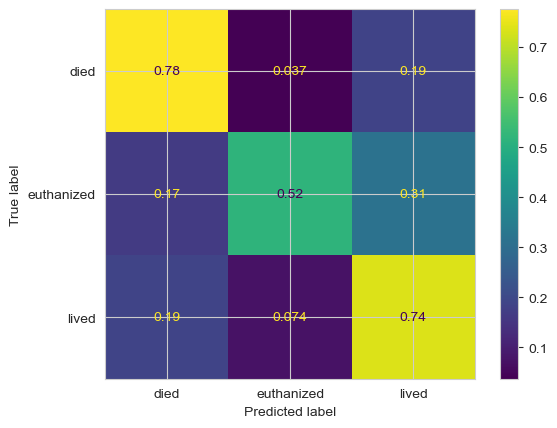

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_train, y_train,random_state=0)

VotingC.fit(x_train_, y_train_)
cm = confusion_matrix(y_test_, VotingC.predict(x_test_), labels=VotingC.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=VotingC.classes_)
disp.plot()
plt.show()

In [40]:
import tensorflow as tf
tf.keras.backend.clear_session()

p = 0.4
model = tf.keras.models.Sequential([
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128*2, activation='relu'),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(128*2, activation='relu'),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(p),
  tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=tf.keras.metrics.F1Score(threshold=0.5))


model.fit(x_train, y_train_enc, epochs=500, validation_split=0.2, workers=-1)

Epoch 1/500
31/31 [==============================] - 1s 9ms/step - loss: 1.0783 - f1_score: 0.1432 - val_loss: 1.0189 - val_f1_score: 0.0258
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 1.0249 - f1_score: 0.1596 - val_loss: 0.9650 - val_f1_score: 0.1648
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 1.0054 - f1_score: 0.1829 - val_loss: 0.9432 - val_f1_score: 0.1766
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.9583 - f1_score: 0.2946 - val_loss: 0.8892 - val_f1_score: 0.2300
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.9558 - f1_score: 0.2830 - val_loss: 0.8961 - val_f1_score: 0.2872
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.9116 - f1_score: 0.3310 - val_loss: 0.8610 - val_f1_score: 0.2869
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.9106 - f1_score: 0.3771 - val_loss: 0.8365 - val_f1_score: 0.3696
Epoch 8/500
3

KeyboardInterrupt: 

In [80]:
model.predict(x_train)

39/39 [==============================] - 0s 684us/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       ...,
       [5.6735075e-11, 1.0000000e+00, 6.3490878e-25],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [79]:
x_train

,id,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,pain_extreme_pain,pain_mild_pain,pain_moderate,pain_severe_pain,pain_slight,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other
0,0.0,1.0,1.0,38.1,132.0,24.0,1.0,1.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,37.5,88.0,12.0,1.0,2.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.0,1.0,38.3,120.0,28.0,1.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,1.0,1.0,37.1,72.0,30.0,0.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,0.0,1.0,38.0,52.0,48.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230.0,1.0,1.0,38.5,129.0,48.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1231,1231.0,1.0,1.0,37.5,60.0,50.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1232,1232.0,1.0,0.0,37.5,84.0,40.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1233,1233.0,1.0,1.0,38.1,70.0,16.0,2.0,1.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
y_train.to_numpy()

array(['died', 'euthanized', 'lived', ..., 'lived', 'lived', 'lived'],
      dtype=object)

In [27]:
VotingC.fit(x_train, y_train_ord)

C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.135244838588127,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eta=0.19105830453317765,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            int...
                                             learning_rate=0.4669956666133753,
                                             max_depth=8,
                                             metric='multi_logloss',
                                             min_child_samples=17,
                                             min_child_weight=6,
                                             n_estimators=60, num_leaves=210,
                                             objective='multiclass',
                                             random_state=1,
                                             reg_alpha=4.828111206786327,
                                             reg_lambda=4.235941804728504,
                                             subsample=0.46967410733682896)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001D66788D550>)],
                 n_jobs=-1, voting='soft')

In [28]:
x_test = df_filtered[pre_df.outcome.isna()]

In [29]:
y_pred = VotingC.predict(x_test)

In [30]:
y_pred_enc = ord_enc.inverse_transform(y_pred.reshape(-1,1))
y_pred_enc

array([['lived'],
       ['lived'],
       ['lived'],
       ['euthanized'],
       ['lived'],
       ['died'],
       ['died'],
       ['died'],
       ['lived'],
       ['lived'],
       ['died'],
       ['lived'],
       ['lived'],
       ['euthanized'],
       ['died'],
       ['lived'],
       ['lived'],
       ['lived'],
       ['died'],
       ['died'],
       ['died'],
       ['died'],
       ['died'],
       ['lived'],
       ['died'],
       ['lived'],
       ['died'],
       ['euthanized'],
       ['lived'],
       ['died'],
       ['lived'],
       ['died'],
       ['died'],
       ['died'],
       ['lived'],
       ['died'],
       ['died'],
       ['euthanized'],
       ['died'],
       ['lived'],
       ['died'],
       ['euthanized'],
       ['died'],
       ['lived'],
       ['lived'],
       ['lived'],
       ['died'],
       ['lived'],
       ['died'],
       ['died'],
       ['died'],
       ['lived'],
       ['died'],
       ['died'],
       ['died'],
       ['live

In [31]:
sub = pd.DataFrame.from_dict({'id':x_test.index, 'outcome':y_pred_enc.reshape(1,-1).tolist()[0]})
sub

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,died
820,2055,euthanized
821,2056,died
822,2057,lived


In [32]:
sub.to_csv("../resources/test_submission.csv",columns=["id","outcome"],index=False)